<a href="https://colab.research.google.com/github/Eswar-11/Deep-Learning/blob/main/Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep learning Lab-4
##Name: K. Bala Eswar
##Reg No: 19BCN7003
##Lab slot:L27+L28



Design a deep learning network for fine tuning of convolutional neural networks use MNIST dataset

In [1]:
from numpy import unique, argmax

from tensorflow.keras.datasets.mnist import load_data

from tensorflow.keras import Sequential

from tensorflow. keras.layers import Conv2D

from tensorflow.keras.layers import MaxPool2D

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Dropout 
from tensorflow.keras.utils import plot_model

from matplotlib import pyplot

import matplotlib.pyplot as plt

import numpy as np



#loading the MNIST dataset

(x_train, y_train), (x_test, y_test) = load_data ()

# reshaping the training and testing data

x_train = x_train.reshape((x_train.shape [0], x_train.shape [1],
                           x_train.shape [2], 1))

x_test = x_test.reshape((x_test.shape [0], x_test.shape [1], x_test.shape [2], 1))

11501568/11490434 [==============================] - 0s 0us/step


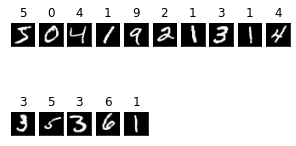

In [2]:
# normalizing the values of pixels of images x_train = x_train.astype ('float32') / 255.0

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
fig= plt. figure(figsize=(5,3))

for i in range(15):
  ax=fig.add_subplot (2,10, i+1, xticks=[], yticks=[]) 
  ax.imshow(np. squeeze (x_train[i]), cmap='gray') 
  ax.set_title (y_train[i])

In [3]:
# determine the shape of the input images 
img_shape = x_train.shape [1:]
print(img_shape)

(28, 28, 1)


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=img_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

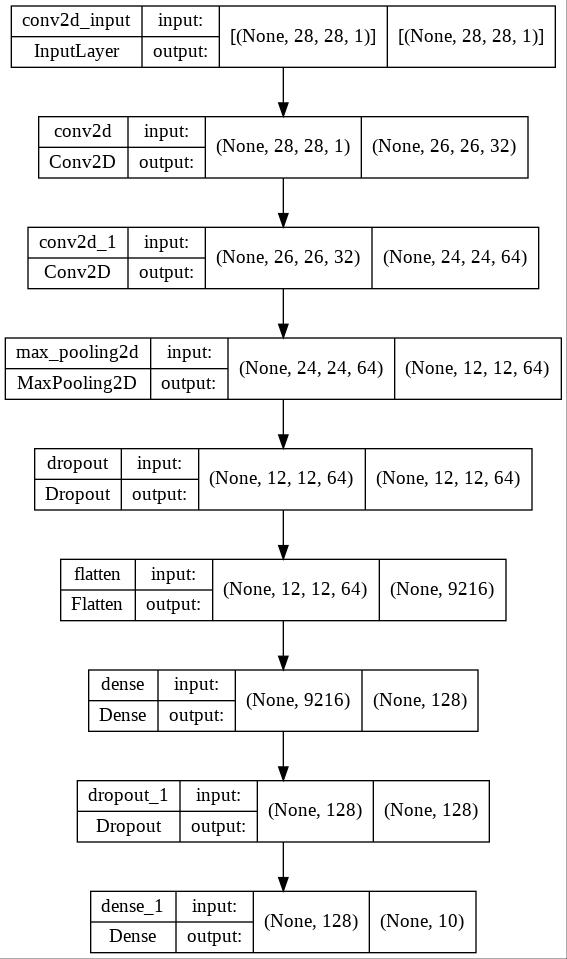

In [5]:
plot_model(model,"model.jpg",show_shapes=True)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x= model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 129s 304ms/step - loss: 0.2703 - accuracy: 0.9182 - val_loss: 0.0600 - val_accuracy: 0.9830
Epoch 2/10
422/422 [==============================] - 128s 303ms/step - loss: 0.0920 - accuracy: 0.9716 - val_loss: 0.0421 - val_accuracy: 0.9892
Epoch 3/10
422/422 [==============================] - 127s 300ms/step - loss: 0.0696 - accuracy: 0.9784 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 4/10
422/422 [==============================] - 126s 298ms/step - loss: 0.0561 - accuracy: 0.9828 - val_loss: 0.0353 - val_accuracy: 0.9895
Epoch 5/10
422/422 [==============================] - 126s 299ms/step - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.0351 - val_accuracy: 0.9907
Epoch 6/10
422/422 [==============================] - 126s 299ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0336 - val_accuracy: 0.9920
Epoch 7/10
422/422 [==============================] - 127s 300ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0351 -

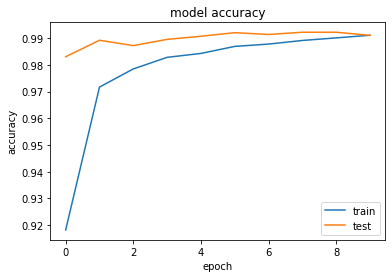

In [7]:
import os
import matplotlib.pyplot as plt
# plotting the metrics
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [8]:
loss, accuracy=model.evaluate(x_test, y_test, verbose=8) 
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.18000102043152


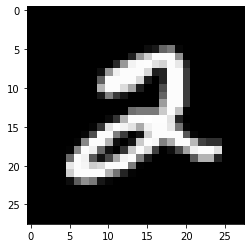

In [9]:
image = x_train [5]

#lets display the image which we want to predict 
plt.imshow (np. squeeze (image), cmap='gray')

plt.show()

In [10]:
image= image.reshape (1, image.shape [0], image.shape [1], image.shape [2]) 
p = model.predict([image]) 
print('Predicted: {}'.format(argmax (p)))

Predicted: 2
